# Improve current target fitting

There are some problems with extracting some targets. In particular faint and extended sources and bright and wide point sources

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 9)
import matplotlib.cm as cm
from astropy.visualization import SqrtStretch, ZScaleInterval, MinMaxInterval
from astropy.visualization.mpl_normalize import ImageNormalize
from ccdproc import CCDData
plt.style.use('dark_background')
%matplotlib inline

[19:54:44][   DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown. [pyplot.switch_backend:225]


In [17]:
def display_image(ccd):
    scale = ZScaleInterval()
#     norm = ImageNormalize(interval=scale, stretch=SqrtStretch())
    fig, ax = plt.subplots(figsize=(16,9))
    z1, z2 = scale.get_limits(ccd.data)
    ax.imshow(ccd.data, clim=(z1, 2 *z2), cmap=cm.gray, origin='lower',
           interpolation='nearest')

In [18]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of goodman_pipeline.core.core failed: Traceback (most recent call last):
  File "/user/simon/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/user/simon/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/user/simon/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/user/simon/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/user/simon/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 280, in update_instances
    frame = next(frame_nfo.frame for frame_nfo in inspect.stack()
StopIteration
]


In [19]:
# ccd = CCDData.read('data/cfzst_0308_at-2020xyk_23-10-2020.fits', unit='adu')
ccd = CCDData.read('data/cfzsto_1014_LTT7379_400Cus.fits', unit='adu')


display_image(ccd=ccd)

[20:04:39][    INFO]: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [ccddata.fits_ccddata_reader:660]


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


ValueError: minvalue must be less than or equal to maxvalue

<Figure size 1152x648 with 1 Axes>

[20:01:12][    INFO]: Searching spectroscopic targets in file: cfzst_0308_at-2020xyk_23-10-2020.fits [core.__call__:4247]
[20:01:12][   DEBUG]: Slit size: 1.0 [core.__call__:4256]
[20:01:12][   DEBUG]: Serial binning: 2 [core.__call__:4258]
[20:01:12][   DEBUG]: Loaded backend Qt5Agg version unknown. [pyplot.switch_backend:225]
[20:01:12][    INFO]: Fitting Linear1D model to spatial profile to detect background shape [core.fit_background:4322]


1.3.3.dev1 ['/data/simon/development/soar/goodman_pipeline/goodman_pipeline']


[20:01:12][    INFO]: Subtracting background shape and level spatial profile for better target identification [core.subtract_background:4403]
[20:01:12][   DEBUG]: New background level after subtraction was found to be 23.32 [core.subtract_background:4425]
[20:01:12][    INFO]: Finding all peaks in spatial profile [core.get_peaks:4486]
[20:01:12][   DEBUG]: Found 5 peaks [core.get_peaks:4504]
[20:01:12][    INFO]: Selecting the 3 most intense peaks out of 5 found [core.filter_peaks:4572]
[20:01:12][    INFO]: Validating peaks by setting threshold 3 times the background level 7.36 [core.filter_peaks:4585]
[20:01:12][   DEBUG]: Intensity threshold set to: 22.08 [core.filter_peaks:4587]
[20:01:12][    INFO]: Selecting peak: Centered: 454.0 Intensity 245.320 [core.filter_peaks:4594]
[20:01:12][    INFO]: Selecting peak: Centered: 427.0 Intensity 182.795 [core.filter_peaks:4594]
[20:01:12][   DEBUG]: Discarding peak: Center 515.0 Intensity 20.771 Reason: Below intensity threshold (22.08) [c

[454, 427]
[]


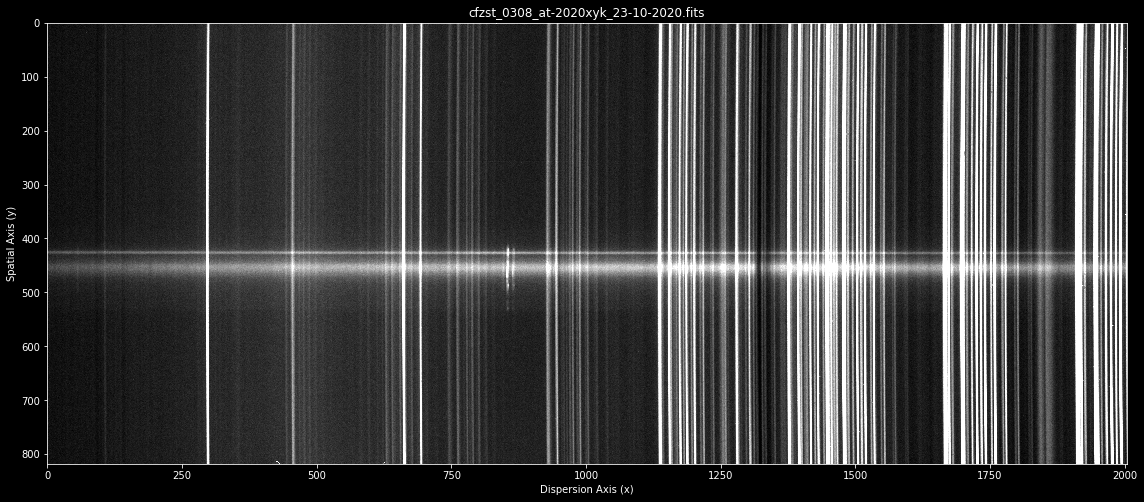

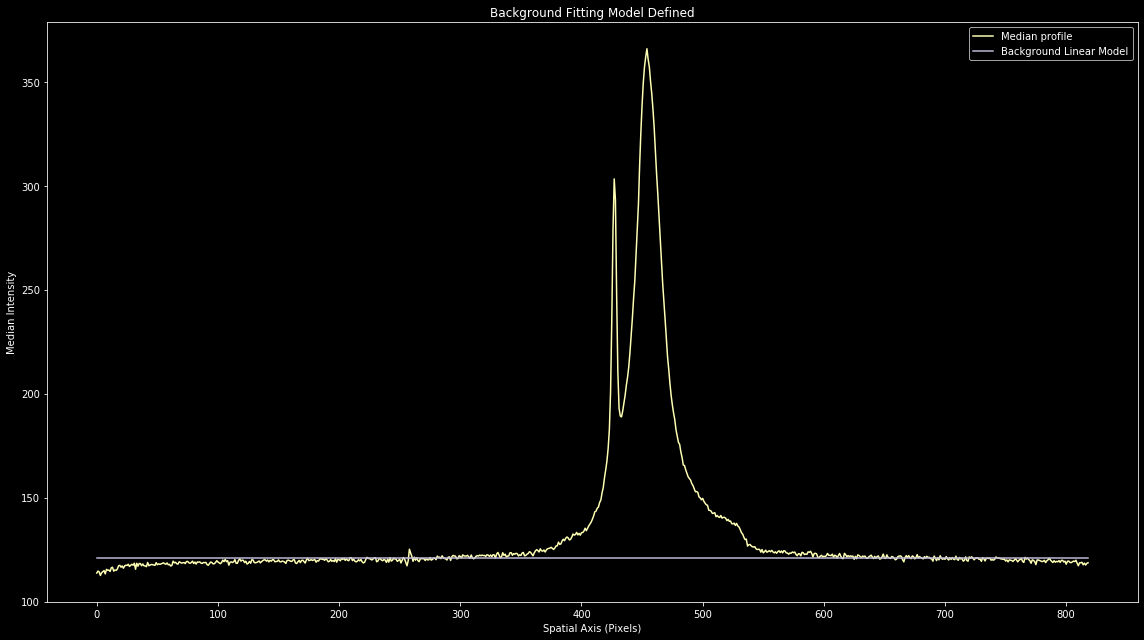

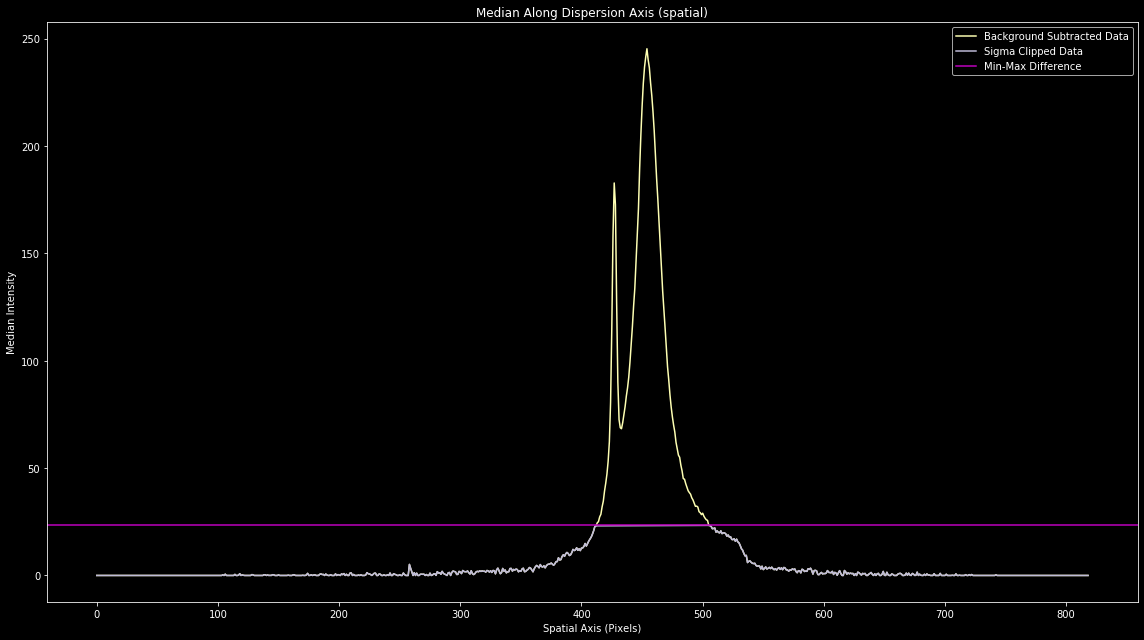

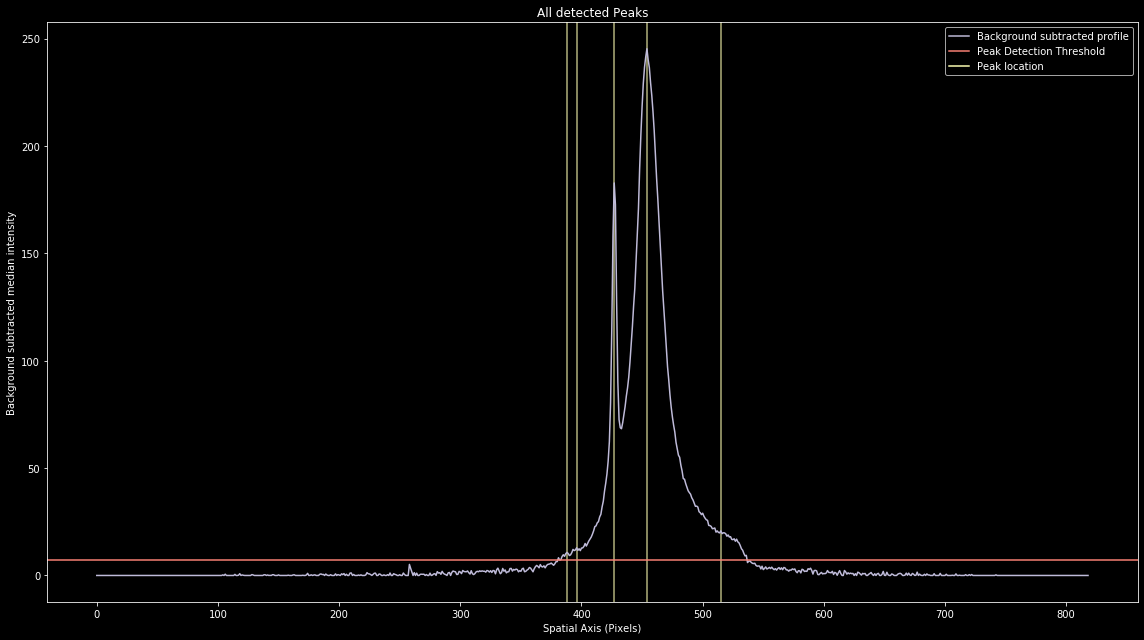

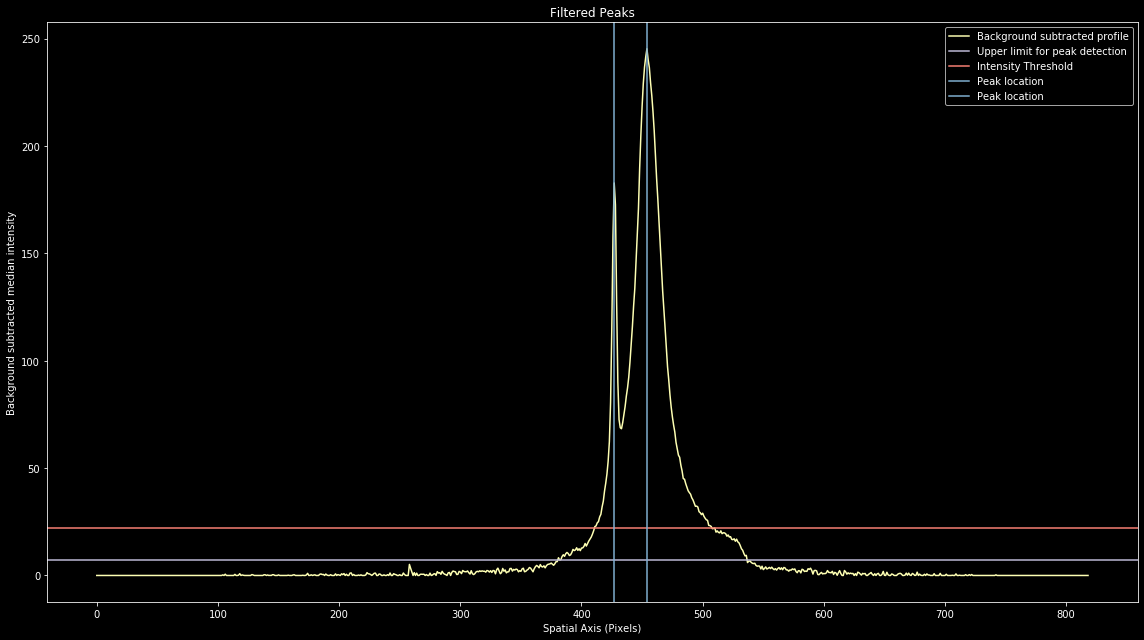

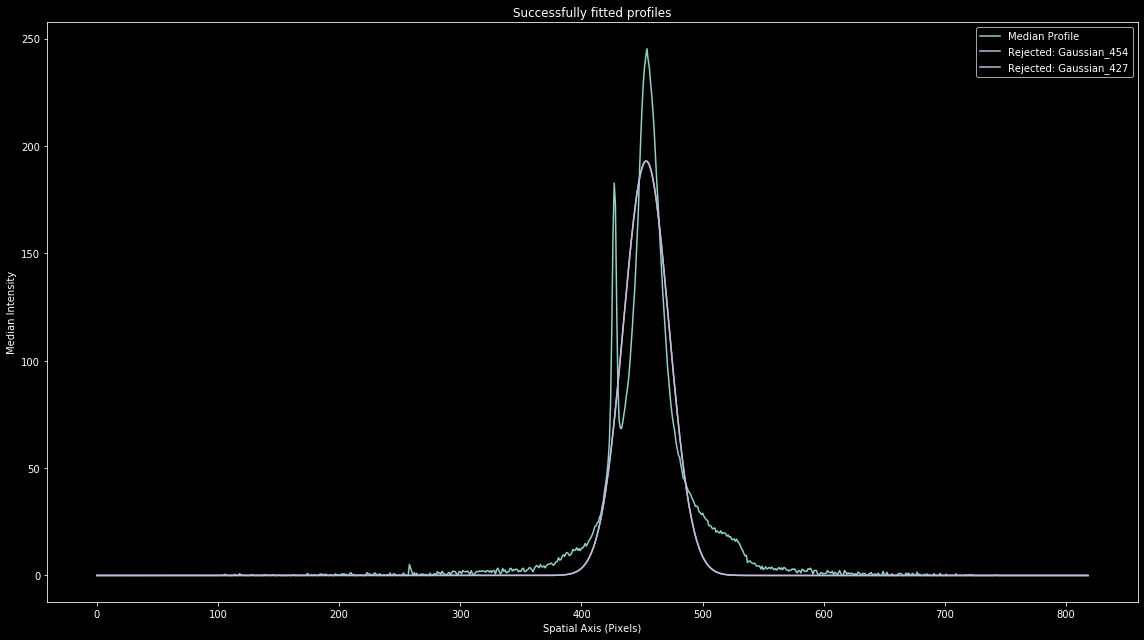

In [15]:

import logging
from goodman_pipeline.core import IdentifySpectroscopicTargets, setup_logging
import goodman_pipeline
setup_logging(debug=True, generic=True)
log = logging.getLogger(__name__)

print(goodman_pipeline.__version__, goodman_pipeline.__path__)

identify = IdentifySpectroscopicTargets()

targets = identify(ccd=ccd, model_name='gaussian', plots=True)
print(identify.selected_peaks)
# targets = identify_targets(ccd=ccd, fit_model='moffat', background_threshold=1, plots=True)
print(targets)

In [ ]:
print(dir(identify_targets))

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(identify_targets.spatial_profile)